# Inflated Introduction

Inflation has captured the nation's attention this year. So when I read about a problem of how to measure price elasticity, my interest perked. I searched Kaggle and found a price, demand dataset about [avocados](https://www.kaggle.com/datasets/neuromusic/avocado-prices). There is no substitute for avocado toast. Shopping at the supermarket, I buy more avocados when prices are low, but consistently buy avocados to enjoy the sweet breakfast toast. Let's use data to prove my intuition.

# Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# plt.style.use("homework")

from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("avocado.csv").iloc[:, 1:]

In [4]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
summarized = data[["Date", "region", "AveragePrice", "Total Volume"]].groupby(["Date", "region"]).mean().reset_index()
summarized.head()

,Date,region,AveragePrice,Total Volume
0,2015-01-04,Albany,1.505,21123.615
1,2015-01-04,Atlanta,1.380,219434.090
2,2015-01-04,BaltimoreWashington,1.185,403581.170
3,2015-01-04,Boise,1.325,40769.720
4,2015-01-04,Boston,1.425,246965.065


In [7]:
nominal = summarized.groupby("region")[["AveragePrice", "Total Volume"]].transform("median")
nominal.head()

,AveragePrice,Total Volume
0,1.55,48056.990
1,1.33,251813.335
2,1.48,386674.385
3,1.31,41848.105
4,1.56,283091.930


In [8]:
summarized["priceDelta"] = (summarized["AveragePrice"] - nominal["AveragePrice"]) / nominal["AveragePrice"]
summarized.head()

,Date,region,AveragePrice,Total Volume,priceDelta
0,2015-01-04,Albany,1.505,21123.615,-0.029032
1,2015-01-04,Atlanta,1.380,219434.090,0.037594
2,2015-01-04,BaltimoreWashington,1.185,403581.170,-0.199324
3,2015-01-04,Boise,1.325,40769.720,0.011450
4,2015-01-04,Boston,1.425,246965.065,-0.086538


In [9]:
summarized["demandDelta"] = (summarized["Total Volume"] - nominal["Total Volume"]) / nominal["Total Volume"]
summarized.head()

,Date,region,AveragePrice,Total Volume,priceDelta,demandDelta
0,2015-01-04,Albany,1.505,21123.615,-0.029032,-0.560447
1,2015-01-04,Atlanta,1.380,219434.090,0.037594,-0.128584
2,2015-01-04,BaltimoreWashington,1.185,403581.170,-0.199324,0.043724
3,2015-01-04,Boise,1.325,40769.720,0.011450,-0.025769
4,2015-01-04,Boston,1.425,246965.065,-0.086538,-0.127615


In [10]:
summarized["Month"] = summarized["Date"].dt.month_name()
summarized.head()

,Date,region,AveragePrice,Total Volume,priceDelta,demandDelta,Month
0,2015-01-04,Albany,1.505,21123.615,-0.029032,-0.560447,January
1,2015-01-04,Atlanta,1.380,219434.090,0.037594,-0.128584,January
2,2015-01-04,BaltimoreWashington,1.185,403581.170,-0.199324,0.043724,January
3,2015-01-04,Boise,1.325,40769.720,0.011450,-0.025769,January
4,2015-01-04,Boston,1.425,246965.065,-0.086538,-0.127615,January


In [11]:
summarized["Season"] = summarized["Month"].replace({
    'January': "Winter", 
    'February': "Winter", 
    'March': "Spring", 
    'April': "Spring", 
    'May': "Spring", 
    'June': "Summer", 
    'July': "Summer",
    'August': "Summer", 
    'September': "Fall", 
    'October': "Fall", 
    'November': "Fall", 
    'December': "Winter"
})
summarized["Year"] = summarized["Date"].dt.year
summarized.head()

,Date,region,AveragePrice,Total Volume,priceDelta,demandDelta,Month,Season,Year
0,2015-01-04,Albany,1.505,21123.615,-0.029032,-0.560447,January,Winter,2015
1,2015-01-04,Atlanta,1.380,219434.090,0.037594,-0.128584,January,Winter,2015
2,2015-01-04,BaltimoreWashington,1.185,403581.170,-0.199324,0.043724,January,Winter,2015
3,2015-01-04,Boise,1.325,40769.720,0.011450,-0.025769,January,Winter,2015
4,2015-01-04,Boston,1.425,246965.065,-0.086538,-0.127615,January,Winter,2015


In [12]:
us_reg = summarized["region"] == "TotalUS"
us_reg.head()

0    False
1    False
2    False
3    False
4    False
Name: region, dtype: bool

In [13]:
us_summary = summarized[us_reg]
us_summary.head()

,Date,region,AveragePrice,Total Volume,priceDelta,demandDelta,Month,Season,Year
51,2015-01-04,TotalUS,1.205,1.596859e+07,-0.073077,-0.056005,January,Winter,2015
105,2015-01-11,TotalUS,1.215,1.486654e+07,-0.065385,-0.121154,January,Winter,2015
159,2015-01-18,TotalUS,1.225,1.487829e+07,-0.057692,-0.120460,January,Winter,2015
213,2015-01-25,TotalUS,1.285,1.451334e+07,-0.011538,-0.142034,January,Winter,2015
267,2015-02-01,TotalUS,1.125,2.269818e+07,-0.134615,0.341819,February,Winter,2015


In [14]:
summarized = summarized[~us_reg]
summarized.head()

,Date,region,AveragePrice,Total Volume,priceDelta,demandDelta,Month,Season,Year
0,2015-01-04,Albany,1.505,21123.615,-0.029032,-0.560447,January,Winter,2015
1,2015-01-04,Atlanta,1.380,219434.090,0.037594,-0.128584,January,Winter,2015
2,2015-01-04,BaltimoreWashington,1.185,403581.170,-0.199324,0.043724,January,Winter,2015
3,2015-01-04,Boise,1.325,40769.720,0.011450,-0.025769,January,Winter,2015
4,2015-01-04,Boston,1.425,246965.065,-0.086538,-0.127615,January,Winter,2015


# Price Elasticity

Median Price: $1.39. Median Demand 205.3K


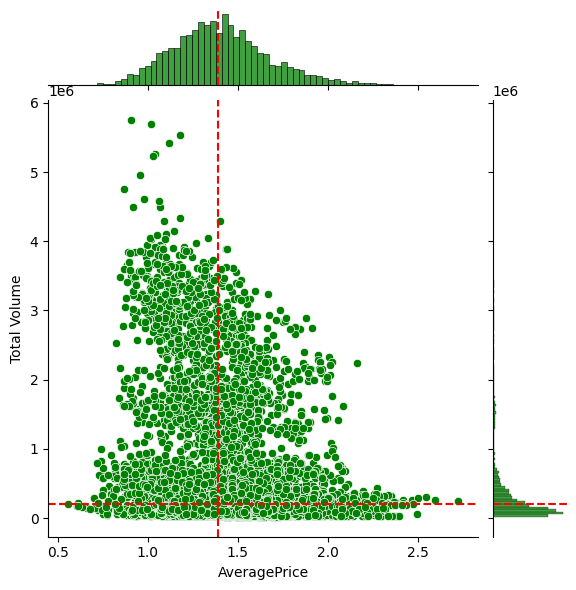

In [15]:
price_med = summarized["AveragePrice"].median()
demand_med = summarized["Total Volume"].median()
h = sns.jointplot(data=summarized, x="AveragePrice", y="Total Volume", color="green")
h.refline(
    x=price_med,
    y=demand_med, 
    color="red")
print(f"Median Price: ${price_med:.2f}. Median Demand {demand_med/1E3:.1f}K")

Comparing Prices to Demand shows the Median Price: $1.39 and Median Demand 205K. Observations are collected over 169 days in 53 regions.

In [16]:
summarized["region"].value_counts().shape

(53,)

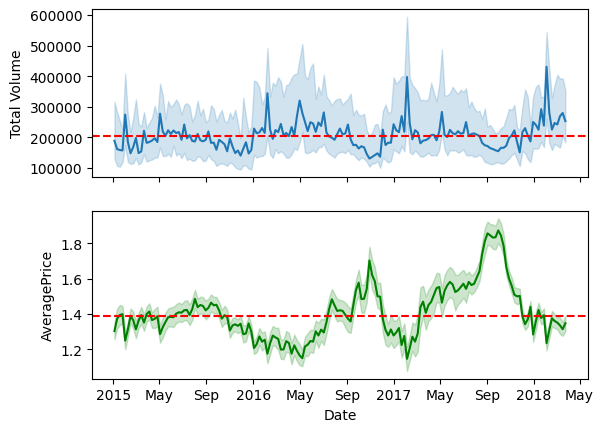

In [17]:
fig, (axd, axp) = plt.subplots(2, 1)
sns.lineplot(data=summarized, x="Date", y="Total Volume", estimator=np.median, ax=axd)
sns.lineplot(data=summarized, x="Date", y="AveragePrice", color="green", ax=axp)

axp.axhline(price_med, ls="--", color="r")

axd.set_xticklabels([])
axd.set_xlabel('')
axp.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(axp.xaxis.get_major_locator()))
axd.axhline(demand_med, ls="--", color="r")

Comparing prices to demand over time shows negative correlations. Higher prices in September correlate with less Volume over the same season. Lower prices below median correlate with higher demand. Prices are generally similar across all regions and time. Regions differ considerably in value because of their sizes, but the distribution appears consistent within a 95\% confidence interval.

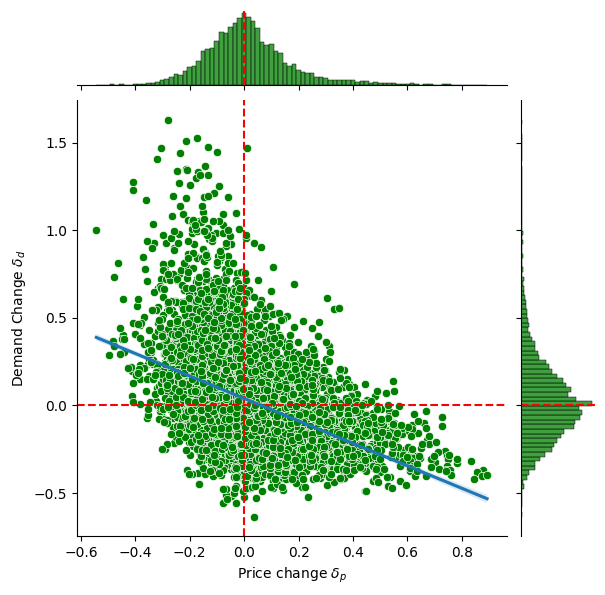

In [18]:
g = sns.jointplot(data=summarized, x="priceDelta", y="demandDelta", color="green")
g.refline(
    x=summarized["priceDelta"].median(),
    y=summarized["demandDelta"].median(), 
    color="red")
sns.regplot(data=summarized, x="priceDelta", y="demandDelta", scatter=False, ax=g.ax_joint)
g.ax_joint.set(
    xlabel=r"Price change $\delta_p$",
    ylabel=r"Demand Change $\delta_d$"
);

In [19]:
lm = LinearRegression()
lm.fit(summarized["priceDelta"].values.reshape(-1, 1), summarized["demandDelta"])
lm.coef_

array([-0.64160951])

A simple economic description is to compare the change in price $\delta_p$ to change in demand $\delta_d$. They are related by
$$
\delta_d = E \delta_p
$$
where $E$ is the elasticity of a good. Elasticity is always negative, with $-1$ meaning demand changes exactly with prices, and being considered inelastic if $0$. Inelastic goods such as air and water are necessary for functioning human. 

Elasticity follows the basic idea of supply and demand: lower prices should increase demand, and higher prices should decrease demand. However, if the good is indespensible (avocado toast?) demand would be inelastic to changes in prices. Computing a linear regression gives the avocado elasticity of $-.64$. Analyzing the scatter plot shows the regression is consistent for high prices, although when prices drop there is a high likelihood demand could skyrocket. 

Regressing within each region shows elasticity varies $-.69 \pm 0.33$ on average. Outliers on either end of the scale are Pittsburgh $E=-2.23$ which is very elastic, and RaleighGreensboro $E=-0.01$. Viewing the time series is not very intuitive. Pittsburgh is a smaller market than Raleigh and avocado prices are much more variable. Comparing the price and demand changes shows Pittsburgh demand is not sensitive to price changes, whereas Raleigh exhibits a clear correlation.

In [20]:
lm = LinearRegression()
names = []
elasticity = []
g = summarized.groupby("region")
for name, group in g:
    lm.fit(group["priceDelta"].values.reshape(-1, 1), group["demandDelta"])
    elasticity.append(lm.coef_)
    names.append(name)
elasticity = np.array(elasticity)
elasticity = pd.Series(elasticity.reshape(-1), index=np.array(names))
elasticity = elasticity.sort_values()
elasticity.name = "Elasticity"

In [21]:
elasticity.describe()

count    53.000000
mean     -0.694153
std       0.331196
min      -2.226560
25%      -0.866360
50%      -0.662013
75%      -0.549415
max      -0.009798
Name: Elasticity, dtype: float64

In [23]:
elasticity.head(15)

Pittsburgh            -2.226560
GrandRapids           -1.197577
NorthernNewEngland    -1.103151
NewYork               -1.080352
Plains                -1.042774
Southeast             -1.020469
HartfordSpringfield   -0.954259
Orlando               -0.947318
Indianapolis          -0.940439
Detroit               -0.922021
Jacksonville          -0.920407
GreatLakes            -0.884281
SanFrancisco          -0.881066
PhoenixTucson         -0.866360
SouthCarolina         -0.865658
Name: Elasticity, dtype: float64

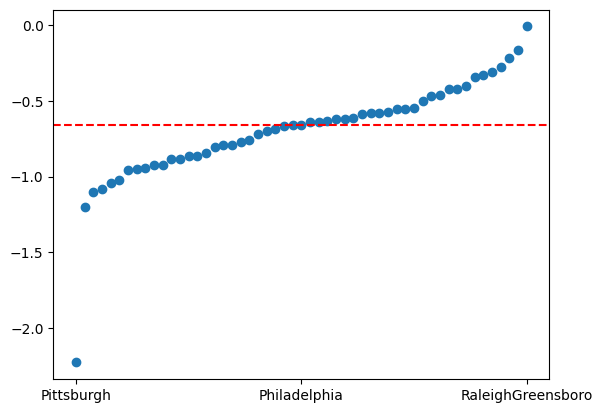

In [24]:
plt.plot(elasticity, 'o')
plt.xticks([0, 53//2, 52])
plt.axhline(elasticity.median(), ls="--", color="red")

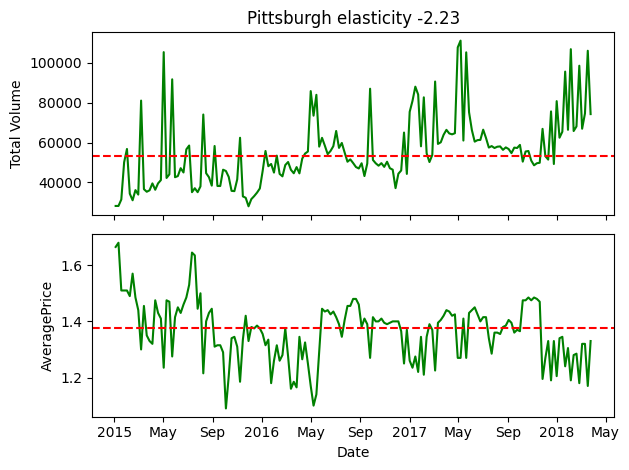

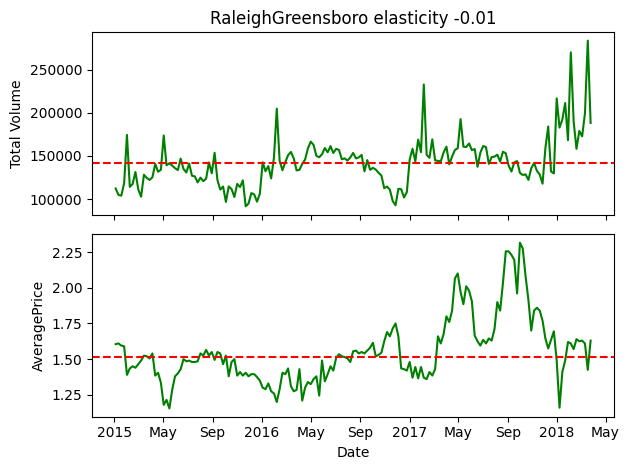

In [25]:
for region in elasticity.index[[0, -1]]:
    regions = summarized[summarized["region"] == region]

    fig, (axd, axp) = plt.subplots(2, 1, tight_layout=True)
    sns.lineplot(data=regions, x="Date", y="Total Volume", color="green", estimator=np.median, ax=axd)
    sns.lineplot(data=regions, x="Date", y="AveragePrice", color="green", ax=axp)

    axd.set_title(f"{region} elasticity {elasticity.loc[region]:.2f}")
    # axp.set_title(f"{region} elasticity {elasticity[-1]:.2f}")
    axd.axhline(regions["Total Volume"].median(), ls="--", color="r")
    axp.axhline(regions["AveragePrice"].median(), ls="--", color="r")

    axd.set_xticklabels([])
    axd.set_xlabel('')
    axp.xaxis.set_major_formatter(
        mdates.ConciseDateFormatter(axp.xaxis.get_major_locator()))

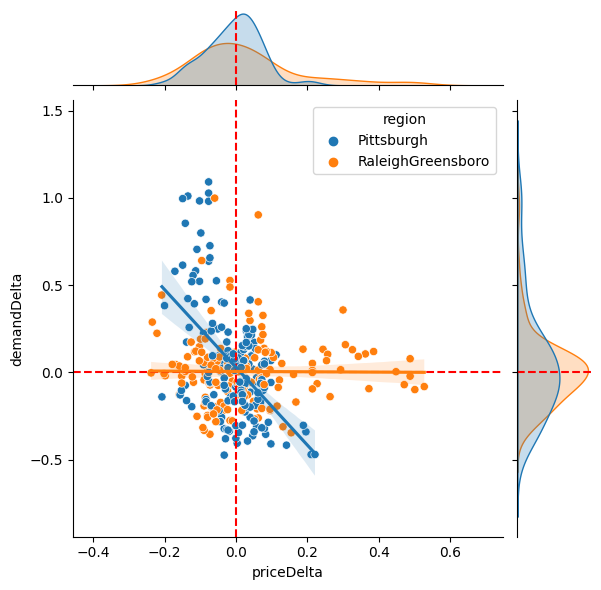

In [26]:
regions = summarized[np.logical_or(
    summarized["region"] == elasticity.index[0],
    summarized["region"] == elasticity.index[-1])]

g = sns.jointplot(data=regions, x="priceDelta", y="demandDelta", hue="region")
g.refline(
    x=regions["priceDelta"].median(),
    y=regions["demandDelta"].median(), 
    color="red")
g.ax_joint.set(
    xlabel=r"Price change $\delta_p$",
    ylabel=r"Demand Change $\delta_d$"
);

for _, region in regions.groupby("region"):
    sns.regplot(data=region, x="priceDelta", y="demandDelta", scatter=False, ax=g.ax_joint)

# Conclusion and Future Work.

This year inflation has captured the nation's attention. Sentiment has soured because there are few alternatives for price increases. Understanding how elasticity works sheds light on why the current situation is frightening. Gasoline price increases do not dent demand very much, so it is an inelastic good. If consumers have no choice but to pay higher prices for the same amount of demand, then the real value of their purchases will inevitably fall.

A more thorough analysis would compare many goods at once. If the price of one good, say oat milk, increases, then a viable substitute would be dairy creamer. The price increase in one good is offset by increased demand for its substitute. The same linear regression model can compute this problem as
$$
\Delta_d = \Delta_p E^d
$$
where $\Delta_{d,p}$ are a $N \times n$ matrices of $n$ goods measured over $N$ days, and $E^d$ is a $n \times n$ demand elasticity matrix. Suppose $E^d_{11}=-0.4$ and $E^d_{21}=0.2$. This means a $1\%$ price increase of the first good, with other prices kept the same, causes demand for the first good to drop $0.4\%$, and demand for the second good increases by $0.2\%$. In this case the second good is a partial substitute for the first good.